In [93]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import os


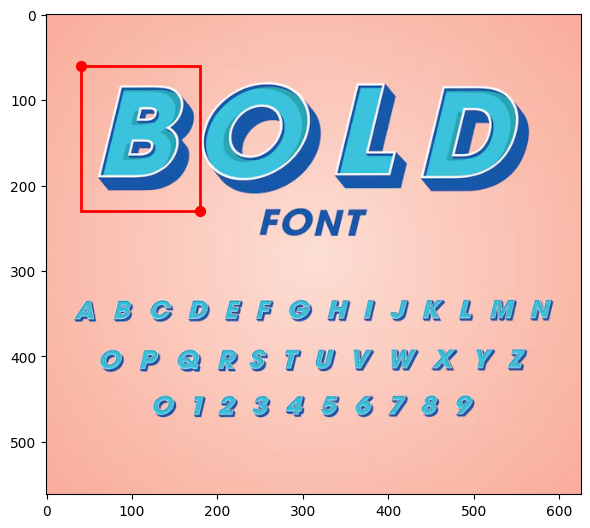

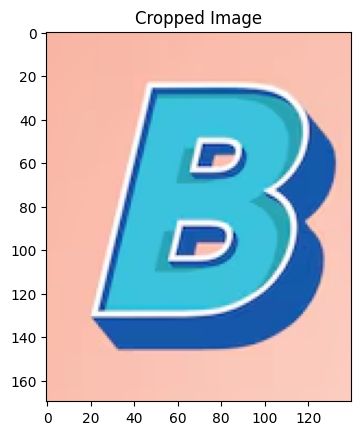

In [109]:
''' 
    image id
    crop id
'''
image_id = 4
crop_id = 1
crop_image_name = f'c{crop_id}'
crop_box_image_name = f'b{crop_id}'

os.makedirs(f"../image_repos/original_images/{image_id}/", exist_ok=True)

point1 = (40, 60)  
point2 = (180, 230) 

# Read image
img = cv2.imread(f"../image_repos/original_images/{image_id}/image.png")

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  

top_left_x = min(point1[0], point2[0])
top_left_y = min(point1[1], point2[1])
width = abs(point2[0] - point1[0])
height = abs(point2[1] - point1[1])

# Plot the box 
fig, ax = plt.subplots()
ax.axis('off')
ax.imshow(img_rgb)
ax.scatter([point1[0], point2[0]], [point1[1], point2[1]], c='red', s=50)
rect = patches.Rectangle((top_left_x, top_left_y), width, height, linewidth=2, edgecolor='r', facecolor='none')
ax.add_patch(rect)

plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.savefig(f'../image_repos/original_images/{image_id}/{crop_box_image_name}.png', bbox_inches='tight', pad_inches=0)
ax.axis('on')
plt.show()

# Plot the cropped image
cropped_img = img[top_left_y:top_left_y+height, top_left_x:top_left_x+width]
cv2.imwrite(f'../image_repos/original_images/{image_id}/{crop_image_name}.png', cropped_img)

plt.figure()
plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
plt.title('Cropped Image')
plt.show()

# Save the position

with open(f'../image_repos/original_images/{image_id}/c{crop_id}.txt', 'w') as writer:
    writer.write(f'{point1[0]}, {point1[1]} | {point2[0]}, {point2[1]}')
